https://blog.daum.net/geoscience/1515 를 참고함

In [1]:
!pip install matplot

  Created wheel for SimpleWebSocketServer: filename=SimpleWebSocketServer-0.1.1-py3-none-any.whl size=9492 sha256=2162e5b92b46167d3ac50bff5bd6b43a257a351a9e9d222b9a2f9e45180be527
  Stored in directory: c:\users\csh51\appdata\local\pip\cache\wheels\02\28\f3\c9739708d8bf7bbbf1e1f5328113363458c229cfe2e23e5f72
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26308 sha256=3fc7146935f4295b63a7cb86512a0967833896addb4251cbbbcae9d00544c3e9
  Stored in directory: c:\users\csh51\appdata\local\pip\cache\wheels\5e\5d\01\3083e091b57809dad979ea543def62d9d878950e3e74f0c930
  Created wheel for ushlex: filename=ushlex-0.99.1-py3-none-any.whl size=4415 sha256=052584c0771c09f29e6f6354781688134a2c5507913a46862059d780ff4eedc5
  Stored in directory: c:\users\csh51\appdata\local\pip\cache\wheels\d1\fd\c1\1a3ae6a14d03618418c757b09c0b55dcb07bb3409a6780a127
Successfully built SimpleWebSocketServer typing ushlex


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [2]:
#데이터 가져오기
df = pd.read_table('시군구별_인프라수_청년수.txt', sep=',', encoding='cp949')
df.head(2)

,Unnamed: 0,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널
0,0,서울_종로구,"32,943",496,28.0,3,60.0,0,1,23,5730,24,201,0,19.0,0.0,367.0,0.0
1,1,서울_중구,"28,277",572,16.0,2,48.0,0,1,17,5383,62,281,1,18.0,0.0,77.0,0.0


In [3]:
#플롯에서 한글이 깨지는 경우가 없도록 폰트 지정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
#앞에 번호 삭제
df = df.drop(columns=['Unnamed: 0'],axis=1)
df.head(3)

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널
0,서울_종로구,"32,943",496,28.0,3,60.0,0,1,23,5730,24,201,0,19.0,0.0,367.0,0.0
1,서울_중구,"28,277",572,16.0,2,48.0,0,1,17,5383,62,281,1,18.0,0.0,77.0,0.0
2,서울_용산구,"52,554",319,19.0,1,47.0,0,1,9,5056,23,104,9,18.0,1.0,48.0,0.0


In [5]:
#데이터 타입 확인
df.dtypes

시군구                       object
청년인구                      object
병원                         int64
사회스포츠                    float64
대학교                        int64
초중고                      float64
공항                         int64
소방서                        int64
경찰서                        int64
소형상업시설(음식점_카페_학원_편의점)      int64
대형상업시설                     int64
숙박시설                       int64
기차역                        int64
행정기관                     float64
법원, 교도소                  float64
문화시설_영화/공연/미술관박물관        float64
버스터미널                    float64
dtype: object

In [6]:
#int로 변경
df = df.astype({'사회스포츠': 'int'})
df = df.astype({'초중고': 'int'})
df = df.astype({'행정기관': 'int'})
df = df.astype({'법원, 교도소': 'int'})
df = df.astype({'문화시설_영화/공연/미술관박물관': 'int'})
df = df.astype({'버스터미널': 'int'})

df['청년인구'] = df['청년인구'].str.replace(",","")

df = df.astype({'청년인구' : 'int'})
 
df.head(2)

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널
0,서울_종로구,32943,496,28,3,60,0,1,23,5730,24,201,0,19,0,367,0
1,서울_중구,28277,572,16,2,48,0,1,17,5383,62,281,1,18,0,77,0


In [7]:
#모든 인프라를 합쳐 '인프라수' 행 추가
df['인프라수'] = df['병원']+df['사회스포츠']+df['대학교']+df['초중고']+df['공항']+df['소방서']+df['경찰서']+df['소형상업시설(음식점_카페_학원_편의점)']+df['대형상업시설']+df['숙박시설']+df['기차역']+df['행정기관']+df['법원, 교도소']+df['문화시설_영화/공연/미술관박물관']+df['버스터미널']
df.head(2)

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,인프라수
0,서울_종로구,32943,496,28,3,60,0,1,23,5730,24,201,0,19,0,367,0,6952
1,서울_중구,28277,572,16,2,48,0,1,17,5383,62,281,1,18,0,77,0,6478


In [8]:
X = df.iloc[:, [1, 17]].values # shape=(22, 2)
m=X.shape[0] # 집합 개수 (m=75)
n=X.shape[1] # 특징 개수 (n=2)

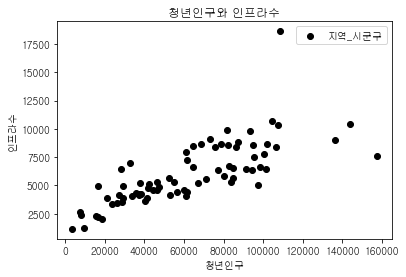

In [9]:
#그래프 시각화
plt.scatter(X[:,0],X[:,1],c='black',label='지역_시군구')
plt.xlabel('청년인구')
plt.ylabel('인프라수')
plt.legend()
plt.title('청년인구와 인프라수')
plt.show()

## K-means 클러스터링

C:\Users\csh51\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


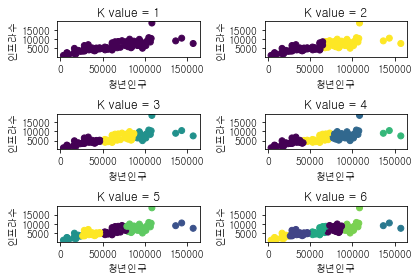

In [10]:
# 클러스터 갯수 결정
from sklearn.cluster import KMeans
from sklearn import preprocessing

for i in range(1, 7):
       # 클러스터 생성
        estimator = KMeans(n_clusters = i)
        ids = estimator.fit_predict(df[['청년인구','인프라수']])
       # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
        plt.subplot(3, 2, i)
        plt.tight_layout()
        # 서브플롯의 라벨링
        plt.title("K value = {}".format(i))
        plt.xlabel('청년인구')
        plt.ylabel('인프라수')
        # 클러스터링 그리기
        plt.scatter(df['청년인구'],df['인프라수'], c=ids)  
plt.show()

In [11]:
K=4 #클러스터 갯수
n_iter=200 # 반복 횟수

Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids # shape=(2, 0)

array([], shape=(2, 0), dtype=float64)

In [12]:
for i in range(K): # 0, 1, 2
    rand=rd.randint(0,m-1) # 0과 74 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
# K개 클러스터 중심 초기값

Output={} #출력값 초기화

# 유클리드 거리 초기화
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance # shape=(75, 0)

array([], shape=(75, 0), dtype=float64)

In [13]:
Centroids[:,0] # shape=(2,)

array([143645.,  10449.])

In [14]:
# 넘파이 브로드캐스트(broadcast): 형상이 다른 배열끼리도 계산 가능
# (75, 2) 행렬 A에서 (2,) 벡터 값을 차감하면, 벡터 값은 (75, 2) 행렬로 확대된 후 연산
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)

np.c_[EuclidianDistance,tempDist] # (75, 0) 행렬에 (75,) 옆으로 붙이기

for k in range(K): # 0, 1, 2
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(75, 3)

# 유클리드 거리가 최소가 되는 색인
C =np.argmin(EuclidianDistance,axis=1)+1

# K 클러스터 저장
C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(75,)

Y={} # 출력값 임시 딕셔너리

for k in range(K): # 0, 1, 2
    Y[k+1]=np.array([]).reshape(2,0) # 특징 개수
    
# 출력값 임시 딕셔너리 갱신
Y[C[0]]=np.c_[Y[C[0]],X[0]] # C[0] 키 값에 대한 재귀적 갱신

for i in range(m): # m=75
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
    
#전치행렬
for k in range(K): # 0, 1, 2
    Y[k+1]=Y[k+1].T
    
for k in range(K): # 0, 1, 2
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [15]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m,0) 
    for k in range(K):     
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) # shape=(75,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(75, 3)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(75,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # Y 딕셔너리 키(K클러스터), 값(청년인구, 인프라수) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y

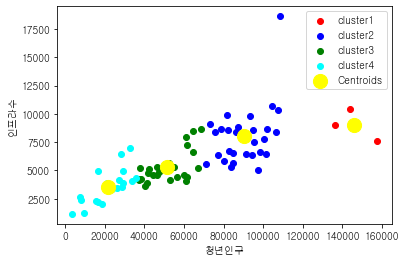

In [16]:
#할때마다 군집의 형태가 바뀜
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='yellow',label='Centroids')
plt.xlabel('청년인구')
plt.ylabel('인프라수')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'iteartuples'

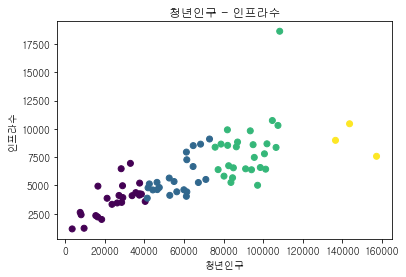

In [106]:
# K = 4으로 클러스터링
estimator = KMeans(n_clusters = 4)

# 클러스터링 생성
cluster_ids = estimator.fit_predict(df[['청년인구', '인프라수']])
# create a scatter plot
plt.scatter(df['청년인구'], df['인프라수'], c=cluster_ids)
plt.title("청년인구 - 인프라수")
plt.xlabel('청년인구')
plt.ylabel('인프라수')
# 제품과 클러스터 id로 데이터에 범례 달기
for index, c_id, 청년인구, 인프라수, 시군구 in df.iteartuples():
    plt.annotate("Clu{}: {}".format(cluster_ids[index],시군구),(청년인구, 인프라수))

In [77]:
#클러스터 1로 분류된 것들
df[cluster_ids == 1].head()

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,인프라수
2,서울_용산구,52554,319,19,1,47,0,1,9,5056,23,104,9,18,1,48,0,5655
3,서울_성동구,67271,457,21,2,69,0,1,10,4562,22,62,3,19,0,31,0,5259
8,서울_강북구,59943,468,120,0,56,0,1,9,3806,25,101,0,15,0,18,0,4619
9,서울_도봉구,61212,370,90,1,71,0,1,9,3429,15,21,5,16,1,12,0,4041
12,서울_서대문구,71045,437,125,6,64,0,1,9,4739,14,75,2,16,0,43,0,5531


In [78]:
df.describe()

,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,인프라수
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,62164.386667,496.920000,88.493333,1.693333,89.546667,0.08000,0.933333,8.813333,5158.520000,23.333333,107.053333,2.120000,17.466667,0.613333,26.573333,0.426667,6022.586667
std,33851.768604,364.456454,54.021611,1.716166,41.543625,0.27312,0.445195,3.383958,2320.013935,14.517774,69.177581,2.404725,4.938359,1.137723,43.513953,0.841063,2730.403099
min,3526.000000,28.000000,15.000000,0.000000,14.000000,0.00000,0.000000,3.000000,733.000000,0.000000,17.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1161.000000
25%,36558.000000,271.500000,45.500000,0.000000,59.500000,0.00000,1.000000,6.000000,3597.000000,12.500000,62.500000,0.000000,14.000000,0.000000,10.500000,0.000000,4189.500000
50%,61222.000000,460.000000,76.000000,1.000000,81.000000,0.00000,1.000000,9.000000,4644.000000,23.000000,90.000000,1.000000,18.000000,0.000000,17.000000,0.000000,5348.000000
75%,85702.500000,614.500000,120.000000,3.000000,109.000000,0.00000,1.000000,11.000000,6829.000000,31.000000,125.500000,3.000000,20.500000,1.000000,27.000000,1.000000,7871.500000
max,157264.000000,2741.000000,261.000000,6.000000,192.000000,1.00000,2.000000,23.000000,15163.000000,62.000000,333.000000,10.000000,30.000000,6.000000,367.000000,4.000000,18621.000000


array([[ 32943,   6952],
       [ 28277,   6478],
       [ 52554,   5655],
       [ 67271,   5259],
       [ 91126,   6470],
       [ 80217,   5824],
       [ 83722,   5266],
       [ 94117,   6387],
       [ 59943,   4619],
       [ 61212,   4041],
       [101260,   6439],
       [ 98566,   6586],
       [ 71045,   5531],
       [ 93492,   9825],
       [ 84550,   5680],
       [136535,   8985],
       [ 84959,   6559],
       [ 56369,   4441],
       [ 94917,   8602],
       [ 97181,   5016],
       [157264,   7575],
       [ 81935,   9915],
       [108355,  18621],
       [143645,  10449],
       [ 95519,   7478],
       [  8049,   2412],
       [ 18425,   1999],
       [ 15455,   2338],
       [ 16436,   2215],
       [ 75731,   8380],
       [ 46382,   5273],
       [ 47538,   4822],
       [ 52833,   4127],
       [ 68385,   8649],
       [ 54995,   5348],
       [ 44260,   4604],
       [ 23640,   3333],
       [ 37451,   4144],
       [ 35665,   4367],
       [ 40407,   3590],
